# Final Report

In [3]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
random.seed(42)
np.random.seed(42)

In [7]:
df = pd.read_csv("./data/cleaned_model_dataset.csv")
matchups = pd.read_csv("./data/cleaned_matchups.csv")

matchups_2025 = pd.read_csv("./data/cleaned_2025_matchups.csv")
matchups_2025_round_64 = matchups_2025[matchups_2025['CURRENT ROUND'] == 64]
df_2025 = pd.read_csv("./data/cleaned_2025_dataset.csv")

df.head()

,YEAR,TEAM,SEED,ROUND,K TEMPO,KADJ T,K OFF,KO RANK,KADJ O,K DEF,...,CONSISTENCY TR RATING,CONSISTENCY V 1-25 WINS,CONSISTENCY V 1-25 LOSS,CONSISTENCY V 26-50 WINS,CONSISTENCY V 26-50 LOSS,CONSISTENCY V 51-100 WINS,CONSISTENCY V 51-100 LOSS,CONSISTENCY HI,CONSISTENCY LO,CONSISTENCY LAST
0,2024,Akron,14,64,66.7747,65.8933,107.841,122,107.009,99.7096,...,8.4,0,0,2,1,2,2,8,232,23
1,2024,Alabama,4,4,74.1625,72.6461,121.712,2,125.601,108.0310,...,13.5,2,1,2,0,0,0,4,361,360
2,2024,Arizona,2,16,73.3760,71.8379,117.653,10,121.125,96.9086,...,13.3,2,2,0,0,1,0,8,359,359
3,2024,Auburn,4,64,70.9629,69.7887,117.364,14,120.579,95.7924,...,11.4,3,0,4,0,1,1,23,346,305
4,2024,Baylor,3,32,66.8428,65.6032,117.262,15,122.490,104.1660,...,9.6,3,1,0,1,2,0,10,354,96


# Introduction

### Millions of people fill out March Madness brackets yearly but many don't use any data analysis method. We wanted to create a project that would be able to use NCAA basketball statistics in order to predict the matchups and winners. March Madness is very unpredictable, however analyzing data trends can provide insight into this. We decided on this idea because because we are people that enjoy basketball and wanted to build a project that used NCAA basketball statistics to predict matchup outcomes. March Madness is famous for its unpredictability, but it can become more predictable when you analyze trends and based on data.

**Data Acquisition:**
- We acquired our data from Kaggle. The data included information on team statistics, tournement matchups and team ranking. For pre-processing, we cleaned the datasets by removing uncesessary columns along with checking for nulls, duplicates, and merging all of the statistics together. We also separated the datasets into training and 2025 dataset that we will test our model on.

**Key Assumptions:**
- The data gathered is based on team statistics, not individual player performance statistics
- Past data is assumed to be complete (excluding 2025 March Madness Data)

**Overview of Report:**
- **Descriptive Analysis:** We use Pivot tables to determine how tournament seed related to a team's success and their overall statistics.
- **Predictive Analysis:** We will initially use logistic regression and decision trees to determine key statistics in determining teams that make deep runs into the tournament. We will also create a model to predict matchups.
- **Ethical Considerations:** We address the ethical implications that this data can have.
- **Conclusion:** We summarize our analysis and findings and discuss whether this can apply to the NBA.  


# Descriptive Analysis
We analyze how  seeding correlates to a team's performance in the tournament by using pivot tables and plotting Offensive and Defensive team efficiency by seed and round.


## How Does Tournament Seeding Relate to Team Performance?

### Here we are creating a pivot table which we are grabbing the columns that we believe are key metrics in detemining tournament success. We then are averaging them grouping them by their seed. (Example: Teams with a ranking seed of 1 have an Effeciency Field Goal percent average of 54.190625)

In [9]:
pivot_df = df[[
    "SEED", "EFG%", "2PT%", "3PT%", "FT%",
    "V 1-25 WINS", "V 1-25 LOSS",
    "V 26-50 WINS", "V 26-50 LOSS",
    "V 51-100 WINS", "V 51-100 LOSS", "KADJ O", "KADJ D"
]]

pv_table = pivot_df.groupby("SEED").mean().reset_index()
print(pv_table)


    SEED       EFG%       2PT%       3PT%        FT%  V 1-25 WINS  \
0      1  54.190625  53.670313  36.909375  71.656250     5.437500   
1      2  53.218750  52.345312  36.537500  71.703125     4.796875   
2      3  52.896875  52.095312  36.260937  71.626563     4.437500   
3      4  52.471875  51.501562  36.231250  71.860938     3.531250   
4      5  52.132812  50.953125  36.146875  72.115625     2.468750   
5      6  52.092188  51.446875  35.639063  70.840625     2.734375   
6      7  51.996875  50.767187  36.176563  71.626563     2.031250   
7      8  52.017187  51.451563  35.432812  70.968750     1.703125   
8      9  51.078125  50.629688  34.615625  70.407813     2.062500   
9     10  51.798485  50.890909  35.624242  71.342424     1.727273   
10    11  51.540244  50.669512  35.460976  71.887805     1.487805   
11    12  52.392647  51.725000  35.757353  71.885294     0.529412   
12    13  52.386154  51.575385  35.980000  70.756923     0.138462   
13    14  52.487692  51.481538  36

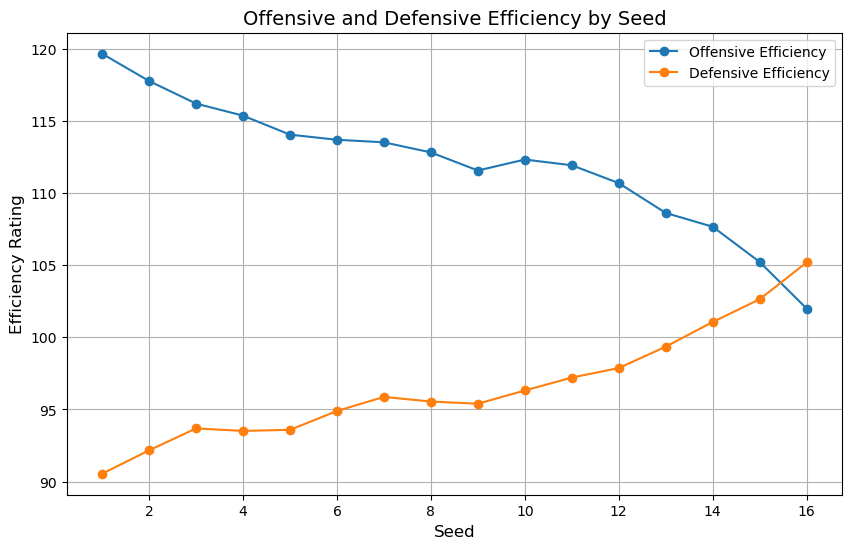

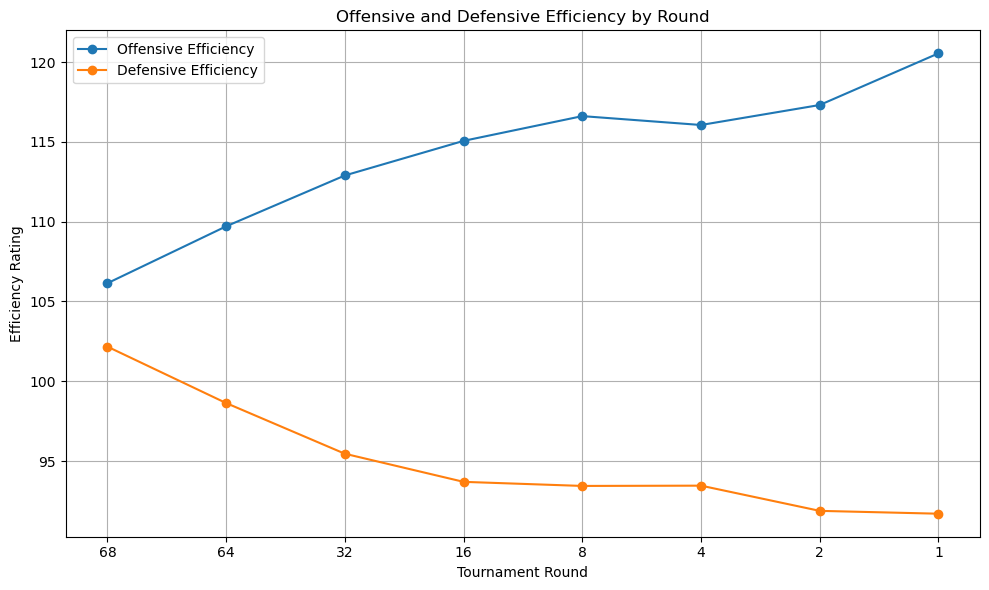

In [11]:
# Plotting KADJ O and KADJ D by Seed
plt.figure(figsize=(10, 6))
plt.plot(pv_table["SEED"], pv_table["KADJ O"], marker='o', label="Offensive Efficiency")
plt.plot(pv_table["SEED"], pv_table["KADJ D"], marker='o', label="Defensive Efficiency")

plt.title("Offensive and Defensive Efficiency by Seed", fontsize=14)
plt.xlabel("Seed", fontsize=12)
plt.ylabel("Efficiency Rating", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Plotting for KADJ O and KADJ D by Seed
round_eff_mean_df = df.groupby("ROUND")[["KADJ O", "KADJ D"]].mean().reset_index()

round_eff_sorted_df = round_eff_mean_df.sort_values("ROUND", ascending=False)

x = range(len(round_eff_sorted_df))

plt.figure(figsize=(10, 6))
plt.plot(x, round_eff_sorted_df["KADJ O"], marker='o', label="Offensive Efficiency")
plt.plot(x, round_eff_sorted_df["KADJ D"], marker='o', label="Defensive Efficiency")
plt.xticks(x, round_eff_sorted_df["ROUND"])
plt.title("Offensive and Defensive Efficiency by Round")
plt.xlabel("Tournament Round")
plt.ylabel("Efficiency Rating")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Results: The results of the pivot table and graph shows a clear correlation between teams that have a higher seed perform better all across the board. They have a higher offensive efficiency and a lower defensive efficiency. This wasn't very surprising to us as higher seeded teams normally have better teams and a better potential to recruit better players. One thing that was very interesting was seeing how consistent the dips in the values are based on their seeding. Lower seeds didn't have much worse 3PT% or FT% but they had much lower wins against the top 25 teams and incrementally had worse defensive and offensive efficiency.

# Predictive Analysis

Can NCAA tournament matchups be predicted based on the model's determined top statistics?

We are initially using logistic regression and decision trees to determine key statistics in determining teams that make deep runs into the tournament. Once we determine these key statistics, we will use a new updated dataframe containing these key statistics and the matchups with team1 and team2 statistics. We will then train a model to predict the winner of matchups based on these stats. From this we will use the 2025 tournament matchups and predict our own bracket and then verify how our model performed.

In [13]:
# Define "DeepRun" as Elite 8 or further (ROUND <= 8)
df['DeepRun'] = df['ROUND']
exclude_cols = ['YEAR', 'TEAM', 'SEED', 'ROUND', 'DeepRun']
stats_cols = [col for col in df.columns if col not in exclude_cols]

X = df[stats_cols]
y = df['DeepRun'].astype(int)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression (L2 regularization / Ridge)
log_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Coefficients (feature weights)
coefs = pd.Series(log_reg.coef_[0], index=stats_cols)
coefs_sorted = coefs.abs().sort_values(ascending=False)
top_features = set(coefs.sort_values(ascending=False).head().index)
print("Logistic Regression Feature Importances (Coefficients):")
print(coefs.sort_values(ascending=False).head())


Logistic Regression Feature Importances (Coefficients):
FT%                      0.707399
CONSISTENCY TR RATING    0.506737
WAB                      0.438914
BADJ EM                  0.420709
LAST                     0.398423
dtype: float64


Here we're training a decision tree on our dataset with the round reached as our label. From this, we're taking the top five features collected from the decision tree and the top features collected from the logistic regression and are incorporating it into our final model.

In [15]:
features = df.drop(columns=['YEAR', 'TEAM', 'ROUND', 'DeepRun'], errors='ignore')
target = df['ROUND']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

feature_importance_list = list(zip(X_train.columns, clf.feature_importances_))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

print("Decision Tree Classifier Feature Importances:")
for feature, importance in feature_importance_list[:5]:
    print(f"{feature}: {importance}")
    top_features.add(feature)
top_features = list(top_features)

Decision Tree Classifier Feature Importances:
TR RANK: 0.08827019193159467
AST%: 0.0328667555973314
SEED: 0.0326260574784262
EXP: 0.03208268057887687
BARTHAG: 0.031585206759939


We are arranging the dataset so that teams from a single matchup are placed into a single row where each column receives a prefix "TEAM_1" or "TEAM_2" dependent on which team the statistic is associated with.

In [17]:
df_matchups = pd.read_csv("./data/cleaned_matchups.csv")
df_stats = df[['YEAR', 'TEAM', 'ROUND'] + top_features]

# Merge TEAM stats into matchups
df_merged = df_matchups.merge(df_stats, how='left', on=['YEAR', 'TEAM'])

# Split into team 1 and 2 dataframes
team1_df = df_merged.loc[df_merged.groupby('MATCHUP_ID').head(1).index].copy()
team2_df = df_merged.loc[df_merged.groupby('MATCHUP_ID').tail(1).index].copy()

# Randomly swap team1 and team2 rows to prevent winning team first always
swap_mask = np.random.randint(0, 2, size=len(team1_df)).astype(bool)
team1_df_swapped = team1_df.copy()
team2_df_swapped = team2_df.copy()
team1_df.loc[swap_mask], team2_df.loc[swap_mask] = (
    team2_df_swapped.loc[swap_mask].values,
    team1_df_swapped.loc[swap_mask].values,
)

team1_df = team1_df.add_suffix('_TEAM1').rename(columns={'MATCHUP_ID_TEAM1': 'MATCHUP_ID'})
team2_df = team2_df.add_suffix('_TEAM2').rename(columns={'MATCHUP_ID_TEAM2': 'MATCHUP_ID'})

df_combined = pd.merge(team1_df, team2_df, on='MATCHUP_ID')

drop_cols = ['YEAR_TEAM1', 'TEAM_TEAM1', 'ROUND_TEAM1', 'SCORE_TEAM1',
             'YEAR_TEAM2', 'TEAM_TEAM2', 'ROUND_TEAM2', 'SCORE_TEAM2', 'MATCHUP_ID', 'CURRENT ROUND_TEAM1', 'CURRENT ROUND_TEAM2', 'WIN_TEAM2']
df_cleaned = df_combined.drop(columns=drop_cols)
df_cleaned = df_cleaned.rename(columns={'WIN_TEAM1': 'TEAM1_WIN'})

df_cleaned.to_csv('./data/cleaned_combined_matchup.csv', index=False)

df_cleaned.head()

,TEAM1_WIN,AST%_TEAM1,LAST_TEAM1,FT%_TEAM1,EXP_TEAM1,BARTHAG_TEAM1,WAB_TEAM1,CONSISTENCY TR RATING_TEAM1,SEED_TEAM1,BADJ EM_TEAM1,...,AST%_TEAM2,LAST_TEAM2,FT%_TEAM2,EXP_TEAM2,BARTHAG_TEAM2,WAB_TEAM2,CONSISTENCY TR RATING_TEAM2,SEED_TEAM2,BADJ EM_TEAM2,TR RANK_TEAM2
0,1,63.7,2.0,74.2,1.709,0.971,11.3,10.8,1.0,33.493,...,48.7,191.0,76.3,2.058,0.356,-6.8,12.7,16.0,-5.725,191.0
1,0,51.0,36.0,72.0,2.764,0.816,1.2,9.9,8.0,14.274,...,59.6,43.0,74.8,2.306,0.872,1.5,10.6,9.0,17.988,43.0
2,1,50.8,32.0,72.9,2.508,0.879,2.6,10.2,5.0,17.670,...,49.6,111.0,74.3,2.218,0.663,-2.7,10.8,12.0,6.447,108.0
3,1,53.3,84.0,70.7,1.910,0.744,-2.5,7.8,13.0,9.732,...,62.0,5.0,75.2,2.195,0.957,5.5,11.4,4.0,28.605,5.0
4,1,53.8,96.0,71.4,1.999,0.761,-1.8,9.2,11.0,10.179,...,63.2,14.0,73.8,2.232,0.907,2.9,10.9,6.0,21.656,14.0


We are splitting our data into a train/test split and doing an initial prediction using a decision tree.

In [19]:
X = df_cleaned.drop('TEAM1_WIN', axis=1)
y = df_cleaned['TEAM1_WIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.6436


We decided on using a RandomForest model since they offer better predictive accuracy, reduce chances of overfitting based on the seeds and lessen the impact of outliers on decisions.

In [21]:
X = df_cleaned.drop('TEAM1_WIN', axis=1)
y = df_cleaned['TEAM1_WIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.6931


Storing our created csv files into pertaining dataframes

In [23]:
df_matchups_2025 = pd.read_csv("./data/cleaned_2025_matchups.csv")
df_stats_2025 = pd.read_csv("./data/cleaned_2025_dataset.csv")

Similar to before, we are arranging the 2025 dataset so that teams from a single matchup are placed into a single row where each column receives a prefix "TEAM_1" or "TEAM_2" dependent on which team the statistic is associated with.

In [25]:
df_matchups_2025 = pd.read_csv("./data/cleaned_2025_matchups.csv")
matchups_2025_round64 = matchups_2025[matchups_2025['CURRENT ROUND'] == 64]
df_stats = df_stats_2025[['YEAR', 'TEAM', 'ROUND'] + top_features]

# Merge TEAM stats into matchups
matchups_2025_round64 = matchups_2025_round64.merge(df_stats, how='left', on=['YEAR', 'TEAM'])

# Split into team 1 and team 2
team1_df = matchups_2025_round64.loc[matchups_2025_round64.groupby('MATCHUP_ID').head(1).index].copy()
team2_df = matchups_2025_round64.loc[matchups_2025_round64.groupby('MATCHUP_ID').tail(1).index].copy()

# Add identifiers
team1_df = team1_df.add_suffix('_TEAM1').rename(columns={'MATCHUP_ID_TEAM1': 'MATCHUP_ID'})
team2_df = team2_df.add_suffix('_TEAM2').rename(columns={'MATCHUP_ID_TEAM2': 'MATCHUP_ID'})

# Combine into one row per matchup
df_combined_2025 = pd.merge(team1_df, team2_df, on='MATCHUP_ID')

# Drop unnecessary columns
drop_cols = ['YEAR_TEAM1', 'TEAM_TEAM1', 'ROUND_TEAM1', 'SCORE_TEAM1',
             'YEAR_TEAM2', 'TEAM_TEAM2', 'ROUND_TEAM2', 'SCORE_TEAM2', 'MATCHUP_ID',
             'CURRENT ROUND_TEAM1', 'CURRENT ROUND_TEAM2', 'WIN_TEAM1', 'WIN_TEAM2']
df_cleaned_2025 = df_combined_2025.drop(columns=drop_cols)

df_cleaned_2025.head()

,AST%_TEAM1,LAST_TEAM1,FT%_TEAM1,EXP_TEAM1,BARTHAG_TEAM1,WAB_TEAM1,CONSISTENCY TR RATING_TEAM1,SEED_TEAM1,BADJ EM_TEAM1,TR RANK_TEAM1,AST%_TEAM2,LAST_TEAM2,FT%_TEAM2,EXP_TEAM2,BARTHAG_TEAM2,WAB_TEAM2,CONSISTENCY TR RATING_TEAM2,SEED_TEAM2,BADJ EM_TEAM2,TR RANK_TEAM2
0,55.5,2,74.0,2.573,0.976,12.5,9.6,1,35.396,2,45.4,280,69.8,2.346,0.270,-10.2,9.3,16,-9.091,279
1,51.9,28,74.4,2.555,0.929,5.5,12.0,8,23.683,28,63.4,31,73.3,1.954,0.885,3.1,9.8,9,19.093,34
2,58.5,27,72.8,2.239,0.907,6.2,11.8,5,20.705,27,57.3,54,74.6,2.447,0.859,1.2,11.3,12,16.494,51
3,47.7,22,69.5,2.764,0.924,5.2,7.9,4,22.555,22,53.4,75,73.6,1.876,0.746,-2.7,10.2,13,10.191,76
4,53.5,30,73.8,2.701,0.900,4.8,10.2,6,20.445,30,51.0,29,73.7,1.623,0.881,1.4,9.2,11,19.020,29


Displaying the top features impacting the model's decisions to ensure that the model is not too dependent on the seeds of teams.

In [27]:
feature_names = X_train.columns
importances = clf.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                        Feature  Importance
15                    WAB_TEAM2    0.077692
5                     WAB_TEAM1    0.069021
11                   LAST_TEAM2    0.066997
14                BARTHAG_TEAM2    0.061443
19                TR RANK_TEAM2    0.060706
18                BADJ EM_TEAM2    0.056944
0                    AST%_TEAM1    0.054305
8                 BADJ EM_TEAM1    0.053785
2                     FT%_TEAM1    0.051131
4                 BARTHAG_TEAM1    0.046781
10                   AST%_TEAM2    0.046456
1                    LAST_TEAM1    0.045700
6   CONSISTENCY TR RATING_TEAM1    0.043346
12                    FT%_TEAM2    0.041910
13                    EXP_TEAM2    0.041149
9                 TR RANK_TEAM1    0.040179
16  CONSISTENCY TR RATING_TEAM2    0.039402
7                    SEED_TEAM1    0.037664
3                     EXP_TEAM1    0.037535
17                   SEED_TEAM2    0.027856


### Feature Importance Analysis

The classifier's feature importances provide insight into which team statistics had the greatest impact on predicting matchup outcomes.

From the ranked list above, we can see that:
- **WAB (Wins Above Bubble)** and **TR RANK (Team Ranking)** are among the most influential features for both teams.
- **BARTHAG**, a predictive strength metric, and **BADJ EM (Adjusted Efficiency Margin)** also contribute significantly.
- Traditional metrics like **FT%**, **AST%**, and **SEED** play a smaller but still meaningful role.
- In general, both team performance metrics and opponent strength (reflected by rankings and predictive models) strongly affect prediction outcomes.

These insights help validate the quality of our selected features and suggest that advanced efficiency and ranking-based metrics are particularly valuable for modeling tournament success.


Run on remainder of tourney

In [29]:
current_round_df = df_combined_2025

# This function pairs the winning teams up to get matchups for next round
def pair_teams(df, features):
    next_round = []
    for i in range(0, len(df), 2):
        a = df.iloc[i]
        b = df.iloc[i+1]
        row = {
            'TEAM_TEAM1': a['TEAM'],
            'TEAM_TEAM2': b['TEAM']
        }
        for feat in features:
            row[f"{feat}_TEAM1"] = a[feat]
            row[f"{feat}_TEAM2"] = b[feat]
        next_round.append(row)
    return pd.DataFrame(next_round)

# This function is used to simulate through each round and predict winners
def simulate_round(df, clf, features):
    cols_t1 = [f"{feat}_TEAM1" for feat in features]
    cols_t2 = [f"{feat}_TEAM2" for feat in features]

    X = df[cols_t1 + cols_t2].copy()
    X = X[clf.feature_names_in_]

    preds = clf.predict(X)
    probs = clf.predict_proba(X)[:, 1]

    results_df = pd.DataFrame({
        'TEAM1': df['TEAM_TEAM1'],
        'TEAM2': df['TEAM_TEAM2'],
        'TEAM1_WIN_PRED': preds,
        'TEAM1_WIN_PROB': probs
    })

    winners = np.where(preds == 1, df['TEAM_TEAM1'], df['TEAM_TEAM2'])
    next_round_df = pd.DataFrame({'TEAM': winners})
    for feat in features:
        next_round_df[feat] = np.where(
            preds == 1,
            df[f"{feat}_TEAM1"],
            df[f"{feat}_TEAM2"]
        )

    paired_next = pair_teams(next_round_df, features)
    return results_df, paired_next

# Sets up rounds
rounds = [
    'Round of 64',
    'Round of 32',
    'Sweet 16',
    'Elite 8',
    'Final Four',
    'Championship'
]

# this runs through all rounds but championship as that is handled separately
for round_name in rounds[:-1]:
    print(f"\n{round_name} results:")
    results_df, current_round_df = simulate_round(current_round_df, clf, top_features)
    print(results_df[['TEAM1', 'TEAM2', 'TEAM1_WIN_PRED', 'TEAM1_WIN_PROB']])

# this handles printing out the championship round
print(f"\n{rounds[-1]} results:")
cols_t1 = [f"{feat}_TEAM1" for feat in top_features]
cols_t2 = [f"{feat}_TEAM2" for feat in top_features]
X_final = current_round_df[cols_t1 + cols_t2].copy()
X_final = X_final[clf.feature_names_in_]

pred_final = clf.predict(X_final)
prob_final = clf.predict_proba(X_final)[:, 1]

champ_df = pd.DataFrame({
    'TEAM1': current_round_df['TEAM_TEAM1'],
    'TEAM2': current_round_df['TEAM_TEAM2'],
    'TEAM1_WIN_PRED': pred_final,
    'TEAM1_WIN_PROB': prob_final
})
print(champ_df[['TEAM1', 'TEAM2', 'TEAM1_WIN_PRED', 'TEAM1_WIN_PROB']])

champion = champ_df.loc[0, 'TEAM1'] if champ_df.loc[0, 'TEAM1_WIN_PRED'] == 1 else champ_df.loc[0, 'TEAM2']
print(f"\n Champion: {champion}")


Round of 64 results:
               TEAM1            TEAM2  TEAM1_WIN_PRED  TEAM1_WIN_PROB
0             Auburn      Alabama St.               1            0.75
1         Louisville        Creighton               1            0.68
2           Michigan     UC San Diego               1            0.54
3          Texas A&M             Yale               1            0.70
4        Mississippi   North Carolina               1            0.54
5           Iowa St.         Lipscomb               1            0.84
6          Marquette       New Mexico               0            0.48
7             Bryant     Michigan St.               0            0.09
8        Norfolk St.          Florida               0            0.03
9           Oklahoma      Connecticut               1            0.63
10      Colorado St.          Memphis               1            0.56
11      Grand Canyon         Maryland               0            0.23
12             Drake         Missouri               0            0.4

**Round of 64 Results:**
- In comparing this to the actual bracket, for the first round, the model predicted 25 matchups correctly and only 7 incorrectly resulting in a first round accuracy of **78.125%**


**Round of 32 Results:**
- In comparing this to the actual bracket, for the second round, the model predicted 12 matchups correctly and only 4 incorrectly resulting in a second round accuracy of **75%**

**Sweet 16 Results:**
- In comparing this to the actual bracket, for the third round, the model predicted 7 matchups correctly and only 1 incorrectly resulting in a third round accuracy of **87.5%**

**Elite 8 Results:**
- In comparing this to the actual bracket, for the fourth round, the model predicted 3 matchups correctly and only 1 incorrectly resulting in a fourth round accuracy of **75%**

**Final Four Results:**
- In comparing this to the actual bracket, for the fifth round, the model predicted all matchups correctly resulting in a fifth round accuracy of **100%**

**Championship:**
- In comparing this to the actual bracket, for the final round, the model did predict the right team to win the championship resulting in a final round accuracy of **100%**

Therefore, the overall accuracy of the model was **79.36%**

### Note on Output Consistency Across Group Members

During testing, we observed that the tournament simulation results could vary slightly depending on which group member’s machine the notebook was run on. This variation, we assume is due to differences in library versions across environments, particularly for:

- `scikit-learn` (model behavior and randomness)
- `pandas` and `numpy` (data handling, ordering, and floating-point precision)

Even though we set `random_state` and seeds consistently, these underlying version mismatches caused small differences in predictions and feature importances.

As a result, **if the code is re-run on a different machine or environment**, you may see differences in some of the **matchup outcomes and the final winner — especially for games with close predicted probabilities**.

# Ethical Considerations

Our data is based on factual data since it is numerical data (points, FG%, etc.) but there are some things to consider:

- **Bias:** Seeding and rankings may not be entirely representative of how well a team is since there are many different conferences that have a stronger or weaker schedule/strength which can affect a team's performance.
- **Fairness:** The models we created primarily predict success based on stats that are better for conferences that are stronger or schools that are larger. Smaller schools might not be represented 100% accurately.
- **Societal Impact:** Overall, there isn't a negative societal impact, however if someone wanted to use this for sports betting then they might lose money.
- **Privacy:** There are no privacy concerns since this is public data and there is no individual player statistics that we used.

**Mitigation:**  
This model is not 100% accurate, therefore this model should only be used for supplemental reasons as people should still do their own research.

## Conclusion
**Insights**
- Teams that made it farther correlated with having a lower Offensive efficiency and a higher defensive efficiency.
- Lower seeds (higher numbers) perform worse across multiple stats, but not dramatically worse in free throw or three-point percentages.

**Limitations**
- Since we only considered overall team statistics, there might be more information that indicates how well a team is doing (individual player performance)

**Future Direction**
 - One potential future direction we could take our project is potentially applying this same concept to the NBA where we try and predict matchups between different NBA teams using our model. The challenges of pursuing this direction are that it may be harder to predict as the NBA has more factors than college such as homecrowd advantage or corner cases such as tanking where teams bench starting players in an attempt to lose more games for a higher draft pick.

 - We could also incorporate points into our predictions where we set points as the label and project final scores of games.

